In [87]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
import CM4Xutils
CM4Xutils.__version__

'0.2.1'

In [89]:
import warnings
import dask
import xarray as xr
import matplotlib.pyplot as plt

import doralite
import gfdl_utils.core as gu

In [90]:
import sys
sys.path.insert(1, '../scipts')
from scripts.remap_functions import remap_budgets_to_sigma2_and_coarsen

### Save month to sigma2 coordinates

In [91]:
grid = CM4Xutils.load_wmt_grid(
    "CM4Xp125",
    interval=str(1850),
    dmget=True
)
display(grid._ds)

Loading CM4Xp125-piControl for interval `1850`.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Loading CM4Xp125-historical for interval `1850`.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Overriding CM4Xp125 grid coordinates from supergrid.
Regridding ice
Skipping average_DT because independent of 'X' and 'Y' dims.
Skipping average_T1 because independent of 'X' and 'Y' dims.
Skipping average_T2 because independent of 

<xarray.Dataset> Size: 1TB
Dimensions:                         (exp: 2, time: 60, z_l: 35, yh: 1120,
                                     xh: 1440, nv: 2, z_i: 36, xq: 1441,
                                     yq: 1121, time_bounds: 61)
Coordinates: (12/29)
  * exp                             (exp) object 16B 'forced' 'control'
  * nv                              (nv) float64 16B 1.0 2.0
  * z_i                             (z_i) float64 288B 0.0 5.0 ... 6.75e+03
  * z_l                             (z_l) float64 280B 2.5 10.0 ... 6.5e+03
  * time                            (time) object 480B 1850-01-16 12:00:00 .....
  * time_bounds                     (time_bounds) object 488B 1850-01-01 00:0...
    ...                              ...
    geolon_c                        (yq, xq) float64 13MB -298.6 -298.4 ... 60.0
    geolat_c                        (yq, xq) float64 13MB -82.47 ... 64.03
    deptho                          (yh, xh) float32 6MB 0.0 0.0 0.0 ... 0.0 0.0
    wet                             (yh, xh) float32 6MB 0.0 0.0 0.0 ... 0.0 0.0
    wet_u                           (yh, xq) float32 6MB 0.0 0.0 0.0 ... 0.0 0.0
    wet_v                           (yq, xh) float32 6MB 0.0 0.0 0.0 ... 0.0 0.0
Data variables: (12/49)
    S_advection_xy                  (exp, time, z_l, yh, xh) float32 27GB dask.array<chunksize=(1, 1, 35, 1120, 1440), meta=np.ndarray>
    average_DT                      (exp, time) timedelta64[ns] 960B dask.array<chunksize=(1, 1), meta=np.ndarray>
    average_T1                      (exp, time) object 960B dask.array<chunksize=(1, 1), meta=np.ndarray>
    average_T2                      (exp, time) object 960B dask.array<chunksize=(1, 1), meta=np.ndarray>
    time_bnds                       (exp, time, nv) object 2kB dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    Sh_tendency_vert_remap          (exp, time, z_l, yh, xh) float32 27GB dask.array<chunksize=(1, 1, 35, 1120, 1440), meta=np.ndarray>
    ...                              ...
    RAIN                            (exp, time, yh, xh) float32 774MB dask.array<chunksize=(1, 1, 373, 480), meta=np.ndarray>
    SNOWFL                          (exp, time, yh, xh) float32 774MB dask.array<chunksize=(1, 1, 373, 480), meta=np.ndarray>
    siconc                          (exp, time, yh, xh) float32 774MB dask.array<chunksize=(1, 1, 373, 480), meta=np.ndarray>
    sithick                         (exp, time, yh, xh) float32 774MB dask.array<chunksize=(1, 1, 373, 480), meta=np.ndarray>
    sigma2                          (exp, time, z_l, yh, xh) float64 54GB dask.array<chunksize=(1, 1, 35, 1120, 1440), meta=np.ndarray>
    sigma2_bounds                   (exp, z_l, yh, xh, time_bounds) float64 55GB dask.array<chunksize=(1, 35, 1120, 1440, 1), meta=np.ndarray>
Attributes:
    filename:            ocean_monthly_z_d2.185001-185412.S_advection_xy.nc
    title:               CM4_historical_c192_OM4p125
    grid_type:           regular
    grid_tile:           N/A
    associated_files:    areacello: 18500101.D2ocean_static.nc
    history:             Fri Jun  9 01:32:07 2023: ncatted -O -a associated_f...
    NCO:                 netCDF Operators version 5.0.1 (Homepage = http://nc...
    external_variables:  volcello
    model:               CM4Xp125
    description:         The CM4Xp125 experimental design following Griffies ...

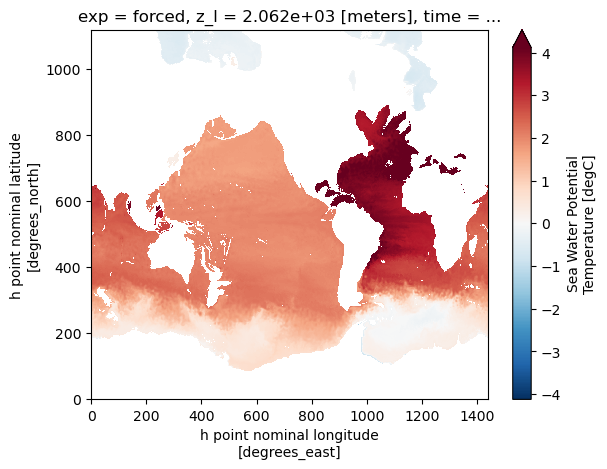

In [113]:
grid._ds["thetao"].isel(z_l=25, time=0, exp=0).plot(robust=True)

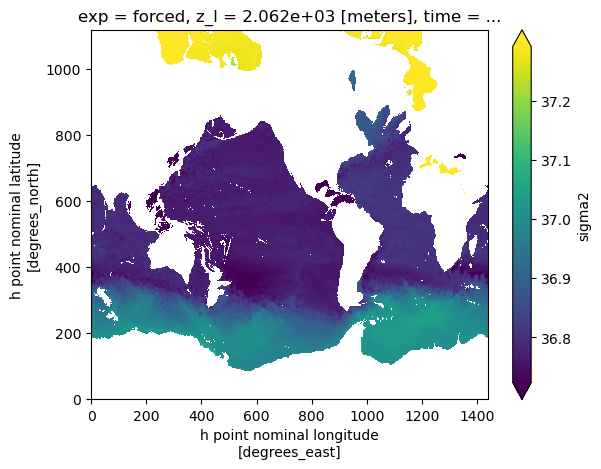

In [114]:
grid._ds["sigma2"].isel(z_l=25, time=0, exp=0).plot(robust=True)

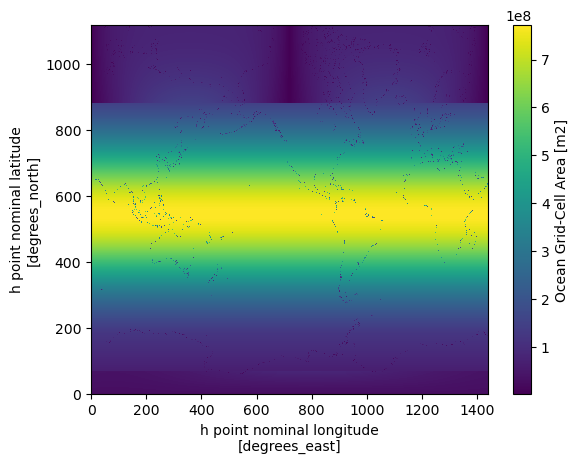

In [115]:
ds.areacello.plot()

In [92]:
ds = CM4Xutils.add_sigma2_coords(grid._ds)
ds = CM4Xutils.remap_vertical_coord("sigma2", ds, grid)

/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/transform.py:245: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  out = xr.apply_ufunc(
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._d

In [93]:
ds_small = ds.isel(exp=0, time=0, time_bounds=slice(0,2))
ds_small.load()

<xarray.Dataset> Size: 30GB
Dimensions:                         (nv: 2, time_bounds: 2, xh: 1440, yq: 1121,
                                     xq: 1441, yh: 1120, sigma2_l: 74,
                                     sigma2_i: 75)
Coordinates: (12/31)
    exp                             <U6 24B 'forced'
  * nv                              (nv) float64 16B 1.0 2.0
    time                            object 8B 1850-01-16 12:00:00
  * time_bounds                     (time_bounds) object 16B 1850-01-01 00:00...
    time_since_init                 object 8B 0101-01-16 12:00:00
    time_bounds_since_init          (time_bounds) object 16B 0101-01-01 00:00...
    ...                              ...
    wet_u                           (yh, xq) float32 6MB 0.0 0.0 0.0 ... 0.0 0.0
    wet_v                           (yq, xh) float32 6MB 0.0 0.0 0.0 ... 0.0 0.0
  * sigma2_l                        (sigma2_l) float64 592B 4.246 ... 38.49
  * sigma2_i                        (sigma2_i) float64 600B -3.0 11.49 ... 39.0
    rho2_i                          (sigma2_i) float64 600B 997.0 ... 1.039e+03
    rho2_l                          (sigma2_l) float64 592B 1.004e+03 ... 1.0...
Data variables: (12/27)
    thkcello                        (yh, xh, sigma2_l) float64 955MB 0.0 ... 0.0
    thkcello_bounds                 (yh, xh, time_bounds, sigma2_l) float64 2GB ...
    S_advection_xy                  (yh, xh, sigma2_l) float64 955MB 0.0 ... 0.0
    Sh_tendency_vert_remap          (yh, xh, sigma2_l) float64 955MB 0.0 ... 0.0
    T_advection_xy                  (yh, xh, sigma2_l) float64 955MB 0.0 ... 0.0
    Th_tendency_vert_remap          (yh, xh, sigma2_l) float64 955MB 0.0 ... 0.0
    ...                              ...
    vert_remap_h_tendency           (yh, xh, sigma2_l) float64 955MB 0.0 ... 0.0
    so_bounds                       (yh, xh, time_bounds, sigma2_l) float64 2GB ...
    thetao_bounds                   (yh, xh, time_bounds, sigma2_l) float64 2GB ...
    sigma2_bounds                   (yh, xh, time_bounds, sigma2_l) float64 2GB ...
    umo                             (yh, xq, sigma2_l) float64 955MB 0.0 ... 0.0
    vmo                             (yq, xh, sigma2_l) float64 956MB 0.0 ... 0.0
Attributes:
    filename:            ocean_monthly_z_d2.185001-185412.S_advection_xy.nc
    title:               CM4_historical_c192_OM4p125
    grid_type:           regular
    grid_tile:           N/A
    associated_files:    areacello: 18500101.D2ocean_static.nc
    history:             Fri Jun  9 01:32:07 2023: ncatted -O -a associated_f...
    NCO:                 netCDF Operators version 5.0.1 (Homepage = http://nc...
    external_variables:  volcello
    model:               CM4Xp125
    description:         The CM4Xp125 experimental design following Griffies ...
    provenance:          Diagnostics have been conservatively remapped into m...

In [109]:
ds_small

<xarray.Dataset> Size: 30GB
Dimensions:                         (nv: 2, time_bounds: 2, xh: 1440, yq: 1121,
                                     xq: 1441, yh: 1120, sigma2_l: 74,
                                     sigma2_i: 75)
Coordinates: (12/31)
    exp                             <U6 24B 'forced'
  * nv                              (nv) float64 16B 1.0 2.0
    time                            object 8B 1850-01-16 12:00:00
  * time_bounds                     (time_bounds) object 16B 1850-01-01 00:00...
    time_since_init                 object 8B 0101-01-16 12:00:00
    time_bounds_since_init          (time_bounds) object 16B 0101-01-01 00:00...
    ...                              ...
    wet_u                           (yh, xq) float32 6MB 0.0 0.0 0.0 ... 0.0 0.0
    wet_v                           (yq, xh) float32 6MB 0.0 0.0 0.0 ... 0.0 0.0
  * sigma2_l                        (sigma2_l) float64 592B 4.246 ... 38.49
  * sigma2_i                        (sigma2_i) float64 600B -3.0 11.49 ... 39.0
    rho2_i                          (sigma2_i) float64 600B 997.0 ... 1.039e+03
    rho2_l                          (sigma2_l) float64 592B 1.004e+03 ... 1.0...
Data variables: (12/27)
    thkcello                        (yh, xh, sigma2_l) float64 955MB 0.0 ... 0.0
    thkcello_bounds                 (yh, xh, time_bounds, sigma2_l) float64 2GB ...
    S_advection_xy                  (yh, xh, sigma2_l) float64 955MB 0.0 ... 0.0
    Sh_tendency_vert_remap          (yh, xh, sigma2_l) float64 955MB 0.0 ... 0.0
    T_advection_xy                  (yh, xh, sigma2_l) float64 955MB 0.0 ... 0.0
    Th_tendency_vert_remap          (yh, xh, sigma2_l) float64 955MB 0.0 ... 0.0
    ...                              ...
    vert_remap_h_tendency           (yh, xh, sigma2_l) float64 955MB 0.0 ... 0.0
    so_bounds                       (yh, xh, time_bounds, sigma2_l) float64 2GB ...
    thetao_bounds                   (yh, xh, time_bounds, sigma2_l) float64 2GB ...
    sigma2_bounds                   (yh, xh, time_bounds, sigma2_l) float64 2GB ...
    umo                             (yh, xq, sigma2_l) float64 955MB 0.0 ... 0.0
    vmo                             (yq, xh, sigma2_l) float64 956MB 0.0 ... 0.0
Attributes:
    filename:            ocean_monthly_z_d2.185001-185412.S_advection_xy.nc
    title:               CM4_historical_c192_OM4p125
    grid_type:           regular
    grid_tile:           N/A
    associated_files:    areacello: 18500101.D2ocean_static.nc
    history:             Fri Jun  9 01:32:07 2023: ncatted -O -a associated_f...
    NCO:                 netCDF Operators version 5.0.1 (Homepage = http://nc...
    external_variables:  volcello
    model:               CM4Xp125
    description:         The CM4Xp125 experimental design following Griffies ...
    provenance:          Diagnostics have been conservatively remapped into m...

In [94]:
ds_small.to_netcdf("../data/transformed_CM4Xp125_single_month.nc")

In [95]:
ds_small.close()

In [24]:
ds = xr.open_dataset("../data/transformed_CM4Xp25_single_month.nc")
grid = CM4Xutils.ds_to_grid(ds)

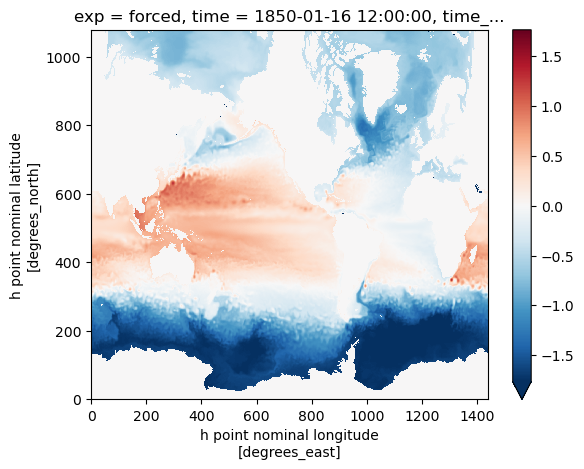

In [39]:
(grid._ds["thkcello"].sum("sigma2_l") - grid._ds["deptho"]).plot(robust=True)

In [69]:
ds_2 = CM4Xutils.coarsen.horizontally_coarsen(grid._ds, grid, {"X":6, "Y":4})
ds_2 = CM4Xutils.add_sigma2_coords(ds_2)
grid_2 = CM4Xutils.ds_to_grid(ds_2)

ds_22 = CM4Xutils.coarsen.horizontally_coarsen(grid_2._ds, grid_2, {"X":4, "Y":3})
ds_22 = CM4Xutils.add_sigma2_coords(ds_22)
grid_22 = CM4Xutils.ds_to_grid(ds_22)

ds_4 = CM4Xutils.coarsen.horizontally_coarsen(grid._ds, grid, {"X":6*4, "Y":4*3})
ds_4 = CM4Xutils.add_sigma2_coords(ds_4)
grid_4 = CM4Xutils.ds_to_grid(ds_4)

Inferring Z grid coordinate: density `sigma2`
Inferring Z grid coordinate: density `sigma2`
Inferring Z grid coordinate: density `sigma2`


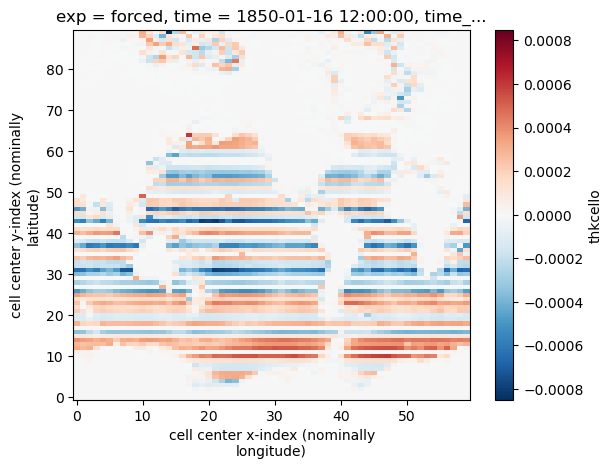

In [70]:
(ds_22["thkcello"].sum("sigma2_l") - ds_4["thkcello"].sum("sigma2_l")).plot()

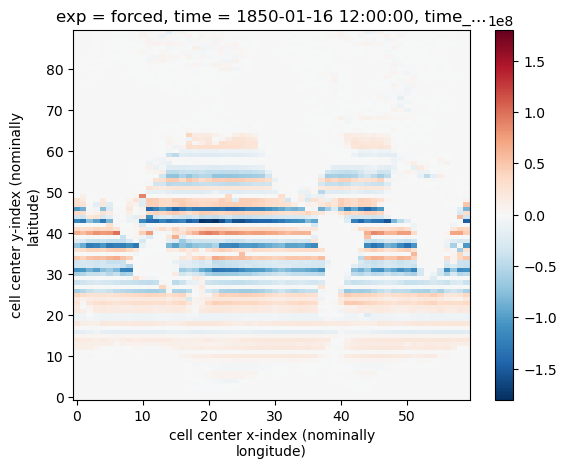

In [71]:
(
    ds_22["thkcello"].sum("sigma2_l")*ds_22.areacello -
    ds_4["thkcello"].sum("sigma2_l")*ds_4.areacello
).plot()

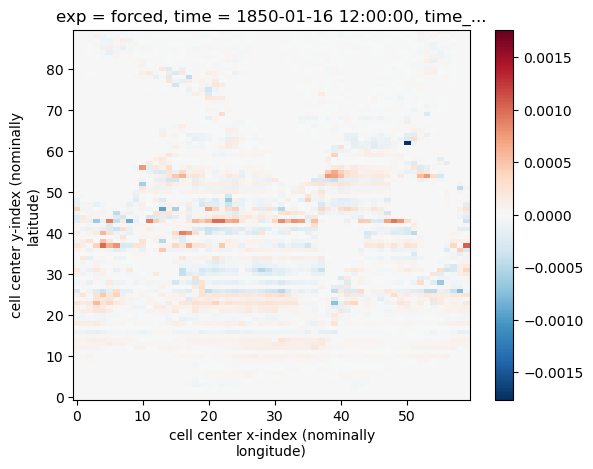

In [72]:
(
    ds_22.dhdt*ds_22.areacello -
    ds_4.dhdt*ds_4.areacello
).sum("sigma2_l").plot()

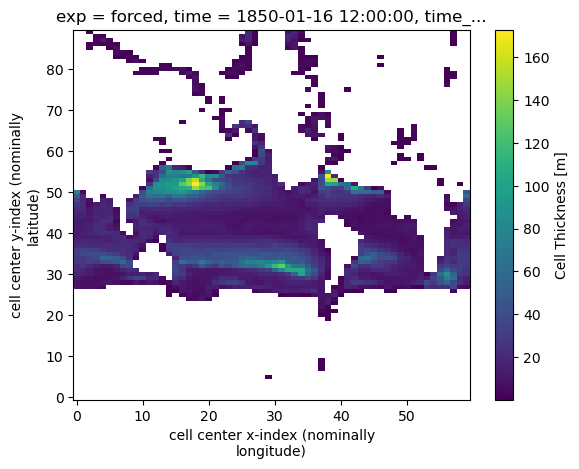

In [75]:
ds_4.thkcello.isel(sigma2_l=25).plot()

In [81]:
(
    (ds.thkcello*ds.areacello).sum().values,
    (ds_22.thkcello*ds_22.areacello).sum().values,
    (ds_4.thkcello*ds_4.areacello).sum().values
)

(array(1.33509557e+18), array(1.33509557e+18), array(1.33509558e+18))

In [82]:
(
    (ds.dhdt*ds.areacello).sum().values,
    (ds_22.dhdt*ds_22.areacello).sum().values,
    (ds_4.dhdt*ds_4.areacello).sum().values
)

(array(-657052.37972128), array(-657052.35175186), array(-657052.38251818))

In [86]:
(
    ds.areacello.where(ds.wet > 0.).sum().values,
    ds_22.areacello.where(ds_22.wet > 0.).sum().values,
    ds_4.areacello.where(ds_4.wet > 0.).sum().values,
)

(array(3.6125584e+14, dtype=float32),
 array(3.61255759e+14),
 array(3.61255759e+14))

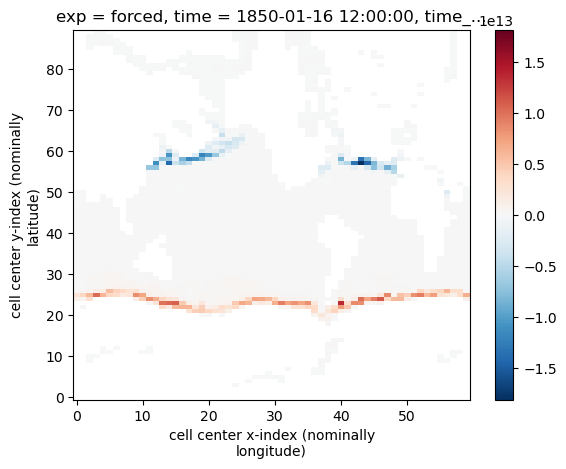

In [99]:
(ds_4.boundary_forcing_heat_tendency * ds_4.areacello).isel(sigma2_l=30).plot()

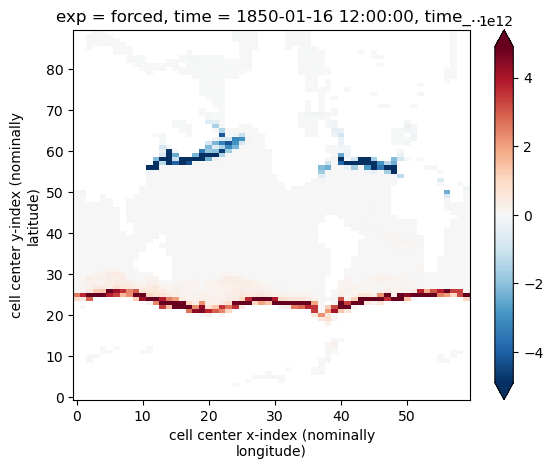

In [106]:
(ds_4.boundary_forcing_heat_tendency * ds_4.areacello).isel(sigma2_l=30).plot(robust=True)

In [108]:
ds_22

<xarray.Dataset> Size: 100MB
Dimensions:                         (yh: 90, xh: 60, sigma2_l: 74,
                                     time_bounds: 2, xq: 61, yq: 91,
                                     sigma2_i: 75)
Coordinates: (12/30)
    exp                             <U6 24B 'forced'
    time                            object 8B 1850-01-16 12:00:00
    time_since_init                 object 8B 0101-01-16 12:00:00
    geolon                          (yh, xh) float64 43kB -296.9 ... 59.85
    lon                             (yh, xh) float64 43kB -296.9 ... 59.85
    geolat                          (yh, xh) float64 43kB -79.45 ... 65.34
    ...                              ...
  * xh                              (xh) int64 480B 0 1 2 3 4 ... 55 56 57 58 59
  * yh                              (yh) int64 720B 0 1 2 3 4 ... 85 86 87 88 89
  * xq                              (xq) int64 488B 0 1 2 3 4 ... 56 57 58 59 60
  * yq                              (yq) int64 728B 0 1 2 3 4 ... 86 87 88 89 90
  * sigma2_i                        (sigma2_i) float64 600B -3.0 11.49 ... 39.0
    rho2_i                          (sigma2_i) float64 600B ...
Data variables: (12/27)
    thkcello                        (yh, xh, sigma2_l) float64 3MB nan ... nan
    thkcello_bounds                 (yh, xh, time_bounds, sigma2_l) float64 6MB ...
    S_advection_xy                  (yh, xh, sigma2_l) float64 3MB nan ... nan
    Sh_tendency_vert_remap          (yh, xh, sigma2_l) float64 3MB nan ... nan
    T_advection_xy                  (yh, xh, sigma2_l) float64 3MB nan ... nan
    Th_tendency_vert_remap          (yh, xh, sigma2_l) float64 3MB nan ... nan
    ...                              ...
    vert_remap_h_tendency           (yh, xh, sigma2_l) float64 3MB nan ... nan
    so_bounds                       (yh, xh, time_bounds, sigma2_l) float64 6MB ...
    thetao_bounds                   (yh, xh, time_bounds, sigma2_l) float64 6MB ...
    sigma2_bounds                   (yh, xh, time_bounds, sigma2_l) float64 6MB ...
    umo                             (yh, xq, sigma2_l) float64 3MB nan ... nan
    vmo                             (yq, xh, sigma2_l) float64 3MB nan ... nan
Attributes:
    filename:            ocean_monthly_z.185001-185412.S_advection_xy.nc
    title:               CM4_historical_c192_OM4p25
    associated_files:    areacello: 18500101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    external_variables:  volcello areacello
    model:               CM4Xp25
    description:         The CM4Xp25 experimental design following Griffies e...
    provenance:          Diagnostics have been conservatively remapped into m...

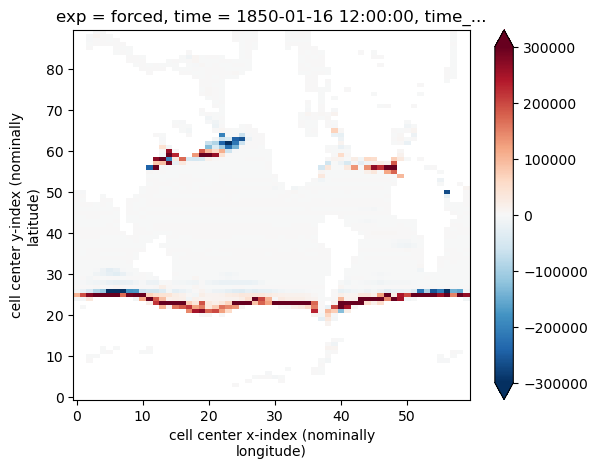

In [105]:
(
    (ds_22.boundary_forcing_heat_tendency * ds_22.areacello) - 
    (ds_4.boundary_forcing_heat_tendency * ds_4.areacello)
).isel(sigma2_l=30).plot(robust=True)